# Design Pattern 13 - Transfer Learning (Chapter 4)

## Introduction to Design Pattern

Transfert learning is tyhe process of taking a pre-trained model that has been trained on "similar" data to the problem we are interested in, preferably trained for a "similar" task, and fine-tuning or retraining it with the dataset that directly models the problem of interest.

Conditions that make a problem suitable for transfer learning:
* we have a small dataset on which to train for our problem
* The problem can be broken down conceptually into two parts:
  * Transforming the input features into a lower dimension feature space, encapsulating understanding of the structure of the data that is pertinent to the task required of the ML model
  * Predicting the output from the feature space.
* The dataset for the target task is similar to that used to train the initial model
* The target task is similar to the task for which the orginal model was trained
  * put another way, the feature space required for the original task, as contained in the last layer reused from the original model, is similar to the frature space required for the new task

Disucssion questions:
* how can we decide if a dataset is sufficiently similar?
* how can we decide if a task is sufficiently similar?


### Bottleneck layer

In the previous section, we talked about a feature space. Typicall what happens in transfer learning, the initial model is prepared for use in transfer learning in the following way:
* load in the model 
* remove the last layer
* set all remaining layers to frozen (i.e. the weights will not be updated in subsequent training)
* add on one or more layers at the end to learn the mapping to the particular target outputs of this problem

The last remaining layer from original model before the new layers that have been added is called the *bottleneck* layer. This is because it is the smallest layer or lowest dimensional representation of the features you wish to capture (like the neck of bottle). So whether or not a model is suitable for transfer learning for your problem, comes down to whether the features captured in the bottleneck layer represented the important features to use as predictors. One can view the output of transfer learning as really 2 models:
* a feature engineering model to produce some lower dimensional predctors for a small model
* a regression or classsification model to predict the targets of your specific problem

Sometimes you may wish to explicitly use 2 separate models (a bit like the cascade pattern #8. The disadvantage of that is you are unable to subsequently use fine tuning.

The feature space represented by the bottlneck layer can be compared:
* an embedding layer for text models
* the latent space in an autoencoder
  * One could create the feature engineering part by creating an autoencoder, removing the decoder layer, and using the encoder part as the model up to the bottleneck, freezing the enoder and adding addtional ayers to train for your specific problem.

*COMMON PITFALL* - Don't forget to strip off the layers after the bottleneck, otherwise you will get poor performance from your model.

### Model source
When doing transfer learning, you can either:
* use your own model that you have trained on another larger dataset, which you load into the framework of choice,
* Load a generic model froman external source or repository of such models, for example:
  * [tensorflow hub](https://tfhub.dev/)

Discussion questions:
* What are the challenges around using a pre-trained model for an external source?

### Why it works

It is worth a brief digression to think about *why* this might work. Lets consider for a moment a young child learning to speak. They want to learn to associate objects with their name. They might lwarn to recognise a cat and associate with the sound of thew word cat by watching an adult, who when there is a cat will point to the cat and say "cat". They will then try to do the same, probably initially pointing to many non-cat objects and saying "cat" and being corrected, and occasionally getting it right and getting positive reinforcement. Initially this is slow, because the child is not just learning about a cat, but all the nerual pathways about recognising objects in their field of vision and associting image with sounds. When an adult or older child encounters a new animal, it is a much faster process, becuase gthey have learned how to recognise objects and associate them with words, they only need to learn the specifics of the new sort of animal. This is transfer learning, where we reuse the part of the task that is common (how to recognise objkect in vision associate it with sounds) and only train new connections for what is different. When the aformentioned toddler moves on from recognising cats to learning to recognise dogs, it will be easier and hopefully faster because they will have the feature engineering to recognise fluffy animals that can be repurposed for recognising dogs as well as cats.

In our neural network, the early layers are typically about recognising low level features, then groups or aggregations of features, and the last layer or last few layers is about the specfics of the classification or regression task. By stripping off the last few layers and adding our own, we can reuse the feayure engineering layers with new layers trained for our specific task. These ayers should have far fewer trainable parameters than the whole network, so can be trained with a much smaller training dataset.

## *When transfer learning goes bad* - trade-offs and alternatives

### Fine-tuning vs feature extraction

There are two different ways of using an existing model.
* **feature extraction** - This is where you chop off layer after bottleneck, freeze remaining layer and some extra layers and only train the new layers, not frozen layers up to bottleneck
* **fine-tuning** - This is where no weights are frozen and you update all the weights from the new dataset
  *  In fine tuning it is.common to still leave some layers frozen, so that you don't change the layers representing the lowest level features, which should be constant, a bit like nerves between the eye and the brain which do some basic feature extraction.

A combination of the two approaches is progressive fine tuning. Here you start with a frozen model and gradually unfreeze more layers for fine-tuning, reducing the learning rate as you progress. This way the earliest layers get some fine tuning, but not a lot, and the later layers representing higher level features get more retraining.

Finding the balance between the two apporaches is still an art, and related to the question of how similar the data and task are to that of the original model training. The more different thety are, the more likely you are to just use feature extraction and avoid finetuning. The following table taken from the MLDP book gives some guidance around these choices:

| Criterion | feature extraction | fine tuning |
|------|------|-----|
| How large is the dataset? | small | large |
|is your prection task similar to pretrained model | different | similar |
| compute budget for transfer learning | small | large |

### Image and text data vs general tabular data
Transfer learning so far has mainly been applied to image and text data, where the common elements of feature extraction are clearer. In general tabiular datasets, it is harder to specify a common data strcuture and feature extraction layers to go with it, so transfer learning is less common for tabular datasets. That being said, work is being done on developing base models for tabular data.
* [TabNet generalised tabular data model](https://arxiv.org/abs/1908.07442)

Discussion questions:
* What are the other potential pitfalls of transfer learning?
* What particular opportunities might treansfer learning present in weather & climate research?
* What particular problems might there be in applying tranfer learning to weather and climate problems?


Examples of when to use transfer learning
* Image-based tasks - We want to predict something specific in an image. General image characteristics and strcuture can be learned from a larger more general dataset, and the ML model can learn the specific task from the smaller dataset using transfer learning, starting from a model with "understanding" of image features.
* We want to predict a specific thing from natural langauge report. An exmaple might be to predict yes/no diagnosis for a disease from written medical reports. The models needs to understnd langauge generally, which can be learny from any text, then transfer learning to learn the specific task.

### technical underpinnings of transfer learning

Certain design patterns and other skills are important for implemente
* check points (see DP #12)
* model saving
* freezing/unfreezing model layers
* adding model layers
* transforming input data to fit the original model

Example code from the book:
* [GitHub repo - transfer_learning.ipynb](https://github.com/GoogleCloudPlatform/ml-design-patterns/blob/master/04_hacking_training_loop/transfer_learning.ipynb)

## Example - classifying the weather in images of the sky

This example is taken from the following blog post:
https://www.h2kinfosys.com/blog/transfer-learning-in-keras-with-examples/

The data used in this is avilable here, together with 2 test images in this repository:
https://data.mendeley.com/datasets/4drtyfjtfy/1

Other tutorials:
* https://medium.com/analytics-vidhya/transfer-learning-with-keras-9a1b3253211c 
* https://keras.io/guides/transfer_learning/

the following requirements definition should create a conda envirnoment for running this notebook:
```
name: mldp_tf
channels:
  - conda-forge
dependencies:
  - ipywidgets
  - python=3.8
  - jupyterlab
  - ipykernel
  - pandas=1.5
  - matplotlib=3.4
  - scikit-learn=1.2
  - tensorflow=2.9
  - tensorboard=2.9
  - mlflow=2.1
  - tensorflow-datasets
  - keras-applications
```

In [1]:
import pathlib
import os
from glob import glob

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten    

First we demonstrate doing a classification with a base model as is, doing the task fro which it was orginally trained, in this case recognising objects

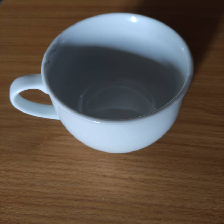

In [36]:
#load the image
cup_image = load_img('./Images/cup.jpeg', target_size=(224, 224))
cup_image

In [37]:
#convert the image to an array
cup_array = img_to_array(cup_image)

In [38]:
#reshape the image
cup_array = cup_array.reshape((1, cup_array.shape[0], cup_array.shape[1], cup_array.shape[2]))
#preprocess the image to be in the best form for the model
cup_array = preprocess_input(cup_array)

In [7]:
#instantiate the model
vgg = VGG16()


2023-02-27 14:24:13.887790: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
#make predictions
prediction = vgg.predict(cup_array)
prediction

1/1 [==============================] - 2s 2s/step


array([[1.14899848e-07, 2.01750072e-06, 5.83161572e-08, 2.72453008e-07,
        4.95119934e-07, 1.02457228e-07, 1.77291938e-07, 2.62034973e-07,
        3.06131170e-07, 9.90755566e-08, 2.83425209e-07, 4.45042446e-07,
        8.58935380e-07, 2.21858204e-06, 6.28068506e-07, 1.58606255e-07,
        4.11044681e-07, 3.28922170e-06, 5.28788132e-06, 2.41434213e-06,
        1.00847387e-06, 6.75838976e-08, 8.18259025e-08, 1.25732953e-07,
        9.78722809e-08, 5.19143306e-08, 2.85867614e-08, 3.11764779e-07,
        2.51977355e-07, 6.84918064e-07, 3.17099534e-07, 9.14077418e-07,
        9.92205997e-08, 5.19820027e-08, 5.32923536e-07, 1.64831803e-07,
        3.90857537e-07, 1.20607780e-07, 1.52453794e-07, 6.28273682e-08,
        2.49924199e-07, 7.26121883e-08, 6.63093900e-08, 6.22913774e-08,
        2.78855254e-07, 2.38300387e-07, 2.31861151e-07, 1.51379083e-07,
        1.06476499e-07, 1.27459131e-07, 1.56106196e-07, 7.09011800e-08,
        6.59244847e-07, 4.86526574e-07, 6.23193955e-07, 2.262882

what does our prediction mean in terms of objects?

In [40]:
#change the probabilities to actual labels
prediction = decode_predictions(prediction)
#return the label with the highest probability
item = prediction[0][0]
 
# print the result
print(f"{item[1]} with a probability of {int(item[2]*100)}%")

coffee_mug with a probability of 25%


## Transfer.Learning
Now lets try using the model for transfer learning. We are going try to repurpose our ibject detector to classify images of the sky.

First we wll get the data. The data is available here. You will need to run some processing to prepare it for use.

```
wget https://data.mendeley.com/public-files/datasets/4drtyfjtfy/files/a03e6097-f7fb-4e1a-9c6a-8923c6a0d3e0/file_downloaded --output-document weather_image_classification.zip
unzip weather_image_classification.zip
mv dataset2 weather_image_classfication
cd weather_image_classfication

for f1 in *.jpeg; do mv $f1 ${f1%.jpeg}.jpg; done
mkdir Train
mkdir Test
for class in rain cloudy shine sunrise; 
do mkdir Train/${class};
for image_num in $(seq 0 200); 
do  mv ${class}${image_num}.jpg Train/${class}/${class}${image_num}.jpg; 
done; done

for class in rain cloudy shine sunrise; 
do mkdir Test/${class}; mv ${class}*.jpg Test/${class}/; 
done

```
```

In [12]:
#generate the train and test data 
train_data_gen = ImageDataGenerator(rescale=1.0/255, 
                               shear_range=0.5,
                                zoom_range=0.7, 
                                horizontal_flip=True,
                                vertical_flip=True)
 

In [13]:
test_data_gen = ImageDataGenerator(rescale=1.0/255)
 


In [14]:
data_dir = pathlib.Path(os.environ['HOME']) / 'data' / 'ml_benchmark' / 'weather_image_classification'
data_dir

PosixPath('/Users/stephen.haddad/data/ml_benchmark/weather_image_classification')

In [15]:
data_dir.is_dir()

True

In [16]:
train_data = train_data_gen.flow_from_directory(data_dir / 'Train',
                                               target_size=(224, 224),
                                               class_mode='categorical')


Found 800 images belonging to 4 classes.


In [17]:
 
test_data = test_data_gen.flow_from_directory(data_dir / 'Test',
                                               target_size=(224, 224),
                                               class_mode='categorical')

Found 325 images belonging to 4 classes.


In [76]:
train_data.class_indices

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [77]:
test_data.class_indices

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

Now lets prepare a model tu use with transfer learning. In this example, we're taking the feature extraction approach, so we will:
* load the model
* freeze all layers
* strip off the final few layers to expose the bottleneck layer
* add on additional layer to map from the feature space of the bottleneck layer to our target outputs
* run training, only updating the trainable parameters of the final layers we have added, not the layers from the base model

In [18]:
vgg_tl = VGG16()

In [19]:
for layer in vgg_tl.layers:
    layer.trainable = False


In [20]:
vgg_tl.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

we still have the final dense layer from training ion imagenet with 1000 classes. We will replace these with similar layers targeting the 4 classes of our dataset, which are
* rain
* cloudy
* sunny
* sunrise

In [21]:
hidden = Flatten()(vgg_tl.layers[-5].output)
outputs_tl = Dense(4, activation='softmax')(hidden)

In [22]:
#create the model
model_tl = Model(inputs=vgg_tl.input, outputs=outputs_tl)
 
#check the model architecture
model_tl.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
#compile the model
model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [24]:
%%time
history = model_tl.fit_generator(train_data, 
                                 validation_data=test_data, 
                                 epochs=5)

<timed exec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
25/25 [==============================] - 176s 7s/step - loss: 1.0077 - accuracy: 0.5987 - val_loss: 0.4659 - val_accuracy: 0.8492
Epoch 2/5
25/25 [==============================] - 173s 7s/step - loss: 0.5074 - accuracy: 0.8087 - val_loss: 0.4411 - val_accuracy: 0.8462
Epoch 3/5
25/25 [==============================] - 174s 7s/step - loss: 0.4568 - accuracy: 0.8363 - val_loss: 0.4246 - val_accuracy: 0.8646
Epoch 4/5
25/25 [==============================] - 171s 7s/step - loss: 0.3913 - accuracy: 0.8587 - val_loss: 0.3186 - val_accuracy: 0.8831
Epoch 5/5
25/25 [==============================] - 177s 7s/step - loss: 0.3148 - accuracy: 0.8938 - val_loss: 0.3880 - val_accuracy: 0.8738
CPU times: user 1h 21min 1s, sys: 5min 41s, total: 1h 26min 43s
Wall time: 14min 32s


(1, 244, 244, 3)
1/1 [==============================] - 0s 138ms/step
prediction for class cloudy is [[1.3149259e-02 5.0009948e-26 4.2421516e-19 9.8685068e-01]]
(1, 244, 244, 3)
1/1 [==============================] - 0s 138ms/step
prediction for class rain is [[1.3706801e-08 7.2011439e-04 9.9789619e-01 1.3836768e-03]]
(1, 244, 244, 3)
1/1 [==============================] - 0s 136ms/step
prediction for class shine is [[0.0000000e+00 0.0000000e+00 1.0000000e+00 2.9357681e-15]]
(1, 244, 244, 3)
1/1 [==============================] - 0s 139ms/step
prediction for class sunrise is [[1.3480204e-19 3.0905751e-18 9.9998271e-01 1.7312233e-05]]


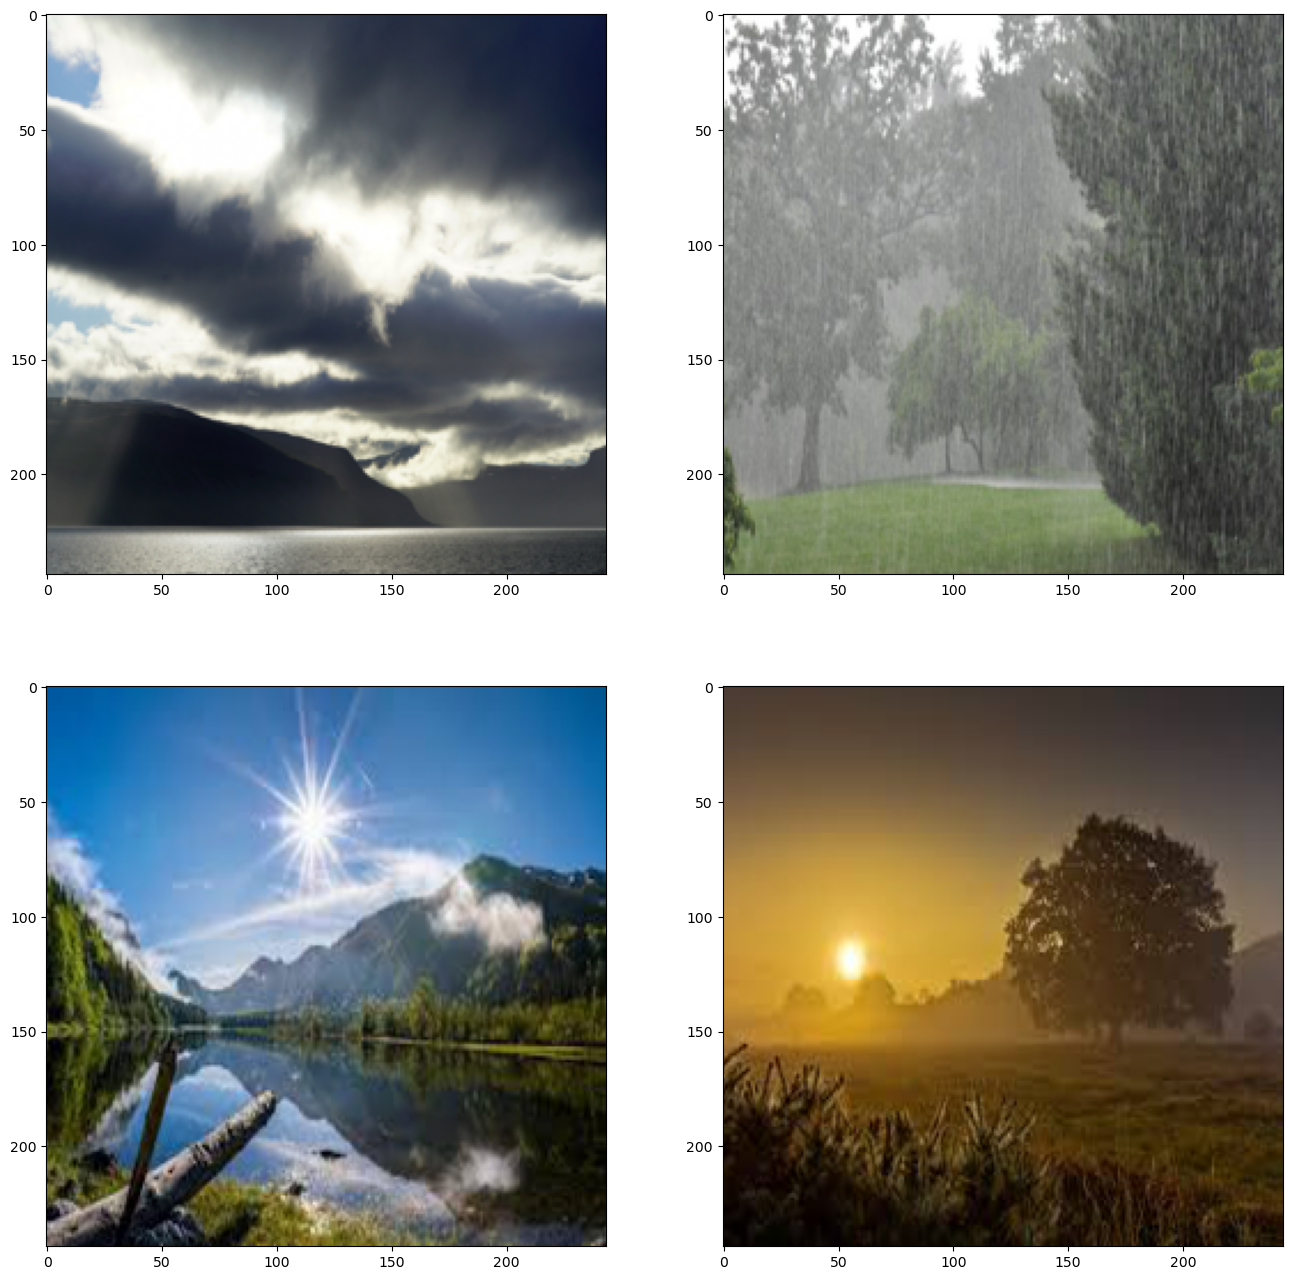

In [75]:
fig1 = plt.figure(figsize=(16,16))
for ix1, class_name in enumerate(['cloudy', 'rain', 'shine', 'sunrise']):
    ax1 = fig1.add_subplot(2,2,ix1+1)
    current_img = load_img([i1 for i1 in (data_dir / 'Train' / class_name).iterdir()][5])
    current_img = current_img.resize((244,244))
    ax1.imshow(current_img)
    current_data = img_to_array(current_img)
    current_data = current_data.reshape((1, current_data.shape[0], current_data.shape[1], current_data.shape[2]))
    current_data = preprocess_input(current_data)
    print(current_data.shape)
    prediction = model_tl.predict(current_data)
    print(f'prediction for class {class_name} is {prediction}')
    

In [50]:
load_img([i1 for i1 in (data_dir / 'Train' / 'cloudy').iterdir()][10]), load_img([i1 for i1 in (data_dir / 'Train' / 'rain').iterdir()][10]), 

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=490x326>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=680x365>)

Now lets test on a new image

In [25]:
#load the image
my_image = load_img('./Images/weather_test.jpg', target_size=(224, 224))
 

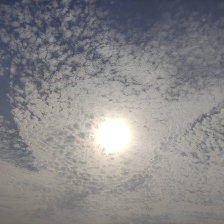

In [26]:
my_image

In [27]:
#preprocess the image
my_image_data = img_to_array(my_image)
my_image_data = my_image_data.reshape((1, my_image_data.shape[0], my_image_data.shape[1], my_image_data.shape[2]))
my_image_data = preprocess_input(my_image_data)
 

In [78]:
test_data.class_indices

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [28]:
#make the prediction
prediction = model_tl.predict(my_image_data)

1/1 [==============================] - 1s 789ms/step


In [29]:
prediction

array([[1.0651849e-30, 1.0444616e-10, 2.1708859e-22, 1.0000000e+00]],
      dtype=float32)

our prediction is thus for class 3, sunrise (which more generally is images where the sun is in the image), which is the correct answer.